Hello! I'm Itsna.

Name: Itsna Hikhmatul Maula

Email: itsnahm7@gmail.com

Dicoding ID: Itsna Hikhmatul Maula


This is a notebook for analyze Bike Sharing dataset as Dicoding final exam. This project consists some tasks. Since the datasets saved in Google Drive, I must connect my Google Colaboratory to Google Drive with code below:

In [ ]:
#google drive and authentication
from google.colab import drive, auth

#google sheet and authentication
from google.auth import default

#spreadsheet
import gspread as gd

#install library
import pandas as pd
import numpy as np
import re
import datetime
#pd.set_option('display.max_rows', None)

In [ ]:
drive.mount('/content/drive')
auth.authenticate_user()

creds,_ = default()

gc = gd.authorize(creds)

Mounted at /content/drive


First step to analyze Bike Sharing dataset is define questions. I want to find the answer through dataset I'll process and analyze.

Based on dataset and informations in Readme.txt file, I have 2 questions about Bike.

1. Which season that the most people to rental the bike happen?
2. What the reasons of the one season when the bike rental highly occured?

After define the questions, I'll explore the datasets to find the answer with Exploratory Data Analysis method as learned from Dicoding Data Scientist program.

**1. Data Identification**

In [ ]:
#define dataset as df_day and df_hour
df_day = pd.read_csv("/content/drive/MyDrive/Beasiswa/Bike-sharing-dataset/day.csv")
df_hour = pd.read_csv("/content/drive/MyDrive/Beasiswa/Bike-sharing-dataset/hour.csv")

In [ ]:
df_day.info()
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

In [ ]:
df_day.isna().sum()
df_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no null values in dataset

In [ ]:
df_day.info()
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

**2. Data Wrangling**

In [ ]:
#change season column from number to object string of 4 season
df_day['season'].replace(1, 'springer', inplace=True)
df_day['season'].replace(2, 'summer', inplace=True)
df_day['season'].replace(3, 'fall', inplace=True)
df_day['season'].replace(4, 'winter', inplace=True)

#change int data in holiday column to string object "Yes" or "No"
df_day['holiday'].replace(0, 'No', inplace=True)
df_day['holiday'].replace(1, 'Yes', inplace=True)

#change int data in year column to year either 2011 or 2012
df_day['yr'].replace(0, 2011, inplace=True)
df_day['yr'].replace(1, 2012, inplace=True)

#change weathersit column from number to object string of 4 season
df_day['weathersit'].replace(1, 'Clear', inplace=True)
df_day['weathersit'].replace(2, 'Mist', inplace=True)
df_day['weathersit'].replace(3, 'Light Snow', inplace=True)
df_day['weathersit'].replace(4, 'Heavy Rain', inplace=True)

#change int data in workingday column to string object "Yes" for 1 or "No" for 0
df_day['workingday'].replace(0, 'No', inplace=True)
df_day['workingday'].replace(1, 'Yes', inplace=True)

#change month number to name of month
df_day['mnth'].replace(1, 'January', inplace=True)
df_day['mnth'].replace(2, 'February', inplace=True)
df_day['mnth'].replace(3, 'March', inplace=True)
df_day['mnth'].replace(4, 'April', inplace=True)
df_day['mnth'].replace(5, 'May', inplace=True)
df_day['mnth'].replace(6, 'June', inplace=True)
df_day['mnth'].replace(7, 'July', inplace=True)
df_day['mnth'].replace(8, 'August', inplace=True)
df_day['mnth'].replace(9, 'September', inplace=True)
df_day['mnth'].replace(10, 'October', inplace=True)
df_day['mnth'].replace(11, 'November', inplace=True)
df_day['mnth'].replace(12, 'December', inplace=True)

#change day number to name of day
df_day['weekday'].replace(0, 'Sunday', inplace=True)
df_day['weekday'].replace(1, 'Monday', inplace=True)
df_day['weekday'].replace(2, 'Tuesday', inplace=True)
df_day['weekday'].replace(3, 'Wednesday', inplace=True)
df_day['weekday'].replace(4, 'Thursday', inplace=True)
df_day['weekday'].replace(5, 'Friday', inplace=True)
df_day['weekday'].replace(6, 'Saturday', inplace=True)

In [ ]:
df_day.describe()

,instant,yr,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2011.500684,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.500342,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,2011.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
df_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,2011,January,No,Saturday,No,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,January,No,Sunday,No,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,January,No,Monday,Yes,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,January,No,Tuesday,Yes,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,January,No,Wednesday,Yes,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,springer,2012,December,No,Thursday,Yes,Mist,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,springer,2012,December,No,Friday,Yes,Mist,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,springer,2012,December,No,Saturday,No,Mist,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,springer,2012,December,No,Sunday,No,Clear,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [ ]:
#change season column from number to object string of 4 season
df_hour['season'].replace(1, 'springer', inplace=True)
df_hour['season'].replace(2, 'summer', inplace=True)
df_hour['season'].replace(3, 'fall', inplace=True)
df_hour['season'].replace(4, 'winter', inplace=True)

#change int data in holiday column to string object "Yes" or "No"
df_hour['holiday'].replace(0, 'No', inplace=True)
df_hour['holiday'].replace(1, 'Yes', inplace=True)

#change int data in year column to year either 2011 or 2012
df_hour['yr'].replace(0, 2011, inplace=True)
df_hour['yr'].replace(1, 2012, inplace=True)

#change weathersit column from number to object string of 4 season
df_hour['weathersit'].replace(1, 'Clear', inplace=True)
df_hour['weathersit'].replace(2, 'Mist', inplace=True)
df_hour['weathersit'].replace(3, 'Light Snow', inplace=True)
df_hour['weathersit'].replace(4, 'Heavy Rain', inplace=True)

#change int data in workingday column to string object "Yes" for 1 or "No" for 0
df_hour['workingday'].replace(0, 'No', inplace=True)
df_hour['workingday'].replace(1, 'Yes', inplace=True)

#change month number to name of month
df_hour['mnth'].replace(1, 'January', inplace=True)
df_hour['mnth'].replace(2, 'February', inplace=True)
df_hour['mnth'].replace(3, 'March', inplace=True)
df_hour['mnth'].replace(4, 'April', inplace=True)
df_hour['mnth'].replace(5, 'May', inplace=True)
df_hour['mnth'].replace(6, 'June', inplace=True)
df_hour['mnth'].replace(7, 'July', inplace=True)
df_hour['mnth'].replace(8, 'August', inplace=True)
df_hour['mnth'].replace(9, 'September', inplace=True)
df_hour['mnth'].replace(10, 'October', inplace=True)
df_hour['mnth'].replace(11, 'November', inplace=True)
df_hour['mnth'].replace(12, 'December', inplace=True)

#change day number to name of day
df_hour['weekday'].replace(0, 'Sunday', inplace=True)
df_hour['weekday'].replace(1, 'Monday', inplace=True)
df_hour['weekday'].replace(2, 'Tuesday', inplace=True)
df_hour['weekday'].replace(3, 'Wednesday', inplace=True)
df_hour['weekday'].replace(4, 'Thursday', inplace=True)
df_hour['weekday'].replace(5, 'Friday', inplace=True)
df_hour['weekday'].replace(6, 'Saturday', inplace=True)

In [ ]:
df_hour.describe()

,instant,yr,hr,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2011.502561,11.546752,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,0.500008,6.914405,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,2011.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011.000000,6.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012.000000,12.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012.000000,18.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012.000000,23.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
df_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,2011,January,0,No,Saturday,No,Clear,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,springer,2011,January,1,No,Saturday,No,Clear,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,springer,2011,January,2,No,Saturday,No,Clear,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,springer,2011,January,3,No,Saturday,No,Clear,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,springer,2011,January,4,No,Saturday,No,Clear,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,springer,2012,December,19,No,Monday,Yes,Mist,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,springer,2012,December,20,No,Monday,Yes,Mist,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,springer,2012,December,21,No,Monday,Yes,Clear,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,springer,2012,December,22,No,Monday,Yes,Clear,0.26,0.2727,0.56,0.1343,13,48,61


**3. Exploratory Data Analysis (EDA)**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

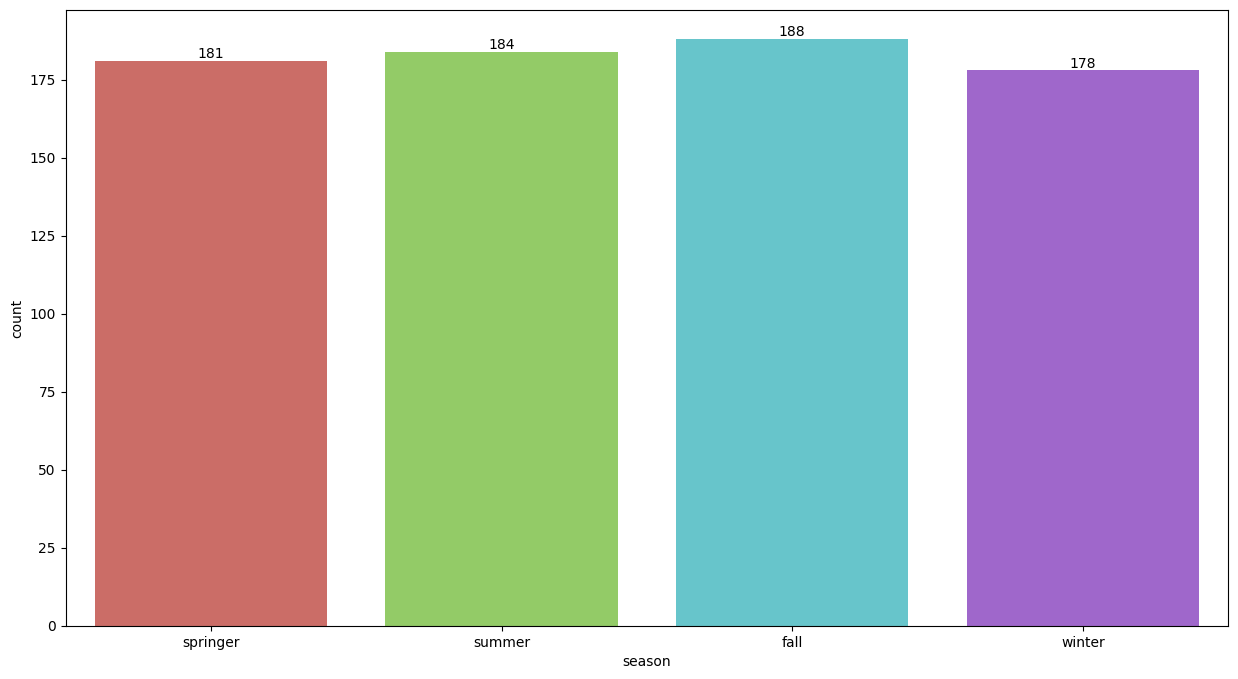

In [ ]:
plt.figure(figsize = (15, 8))
ax = sns.countplot(x='season', data=df_day, palette="hls")
ax.bar_label(ax.containers[0]);

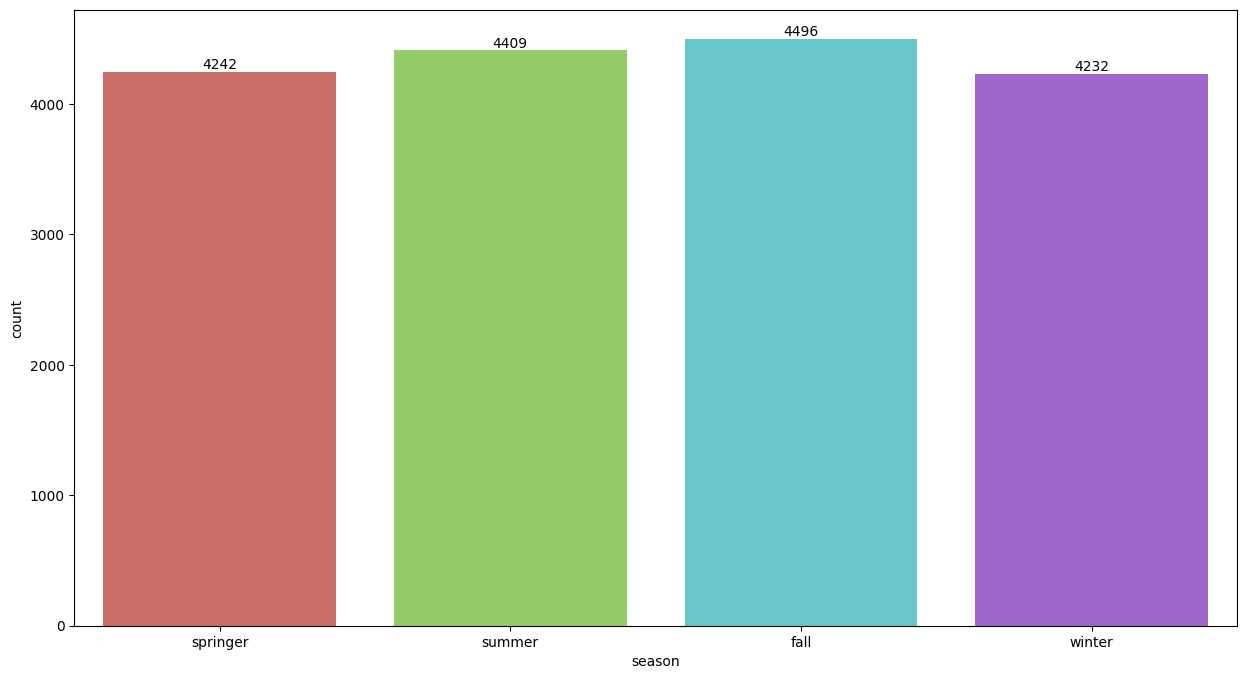

In [ ]:
plt.figure(figsize = (15, 8))
ax = sns.countplot(x='season', data=df_hour, palette="hls")
ax.bar_label(ax.containers[0]);

<Axes: ylabel='season'>

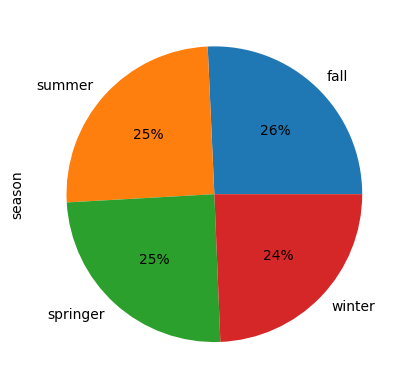

In [ ]:
df_day.season.value_counts().plot(kind='pie', autopct='%1.0f%%')

<Axes: ylabel='season'>

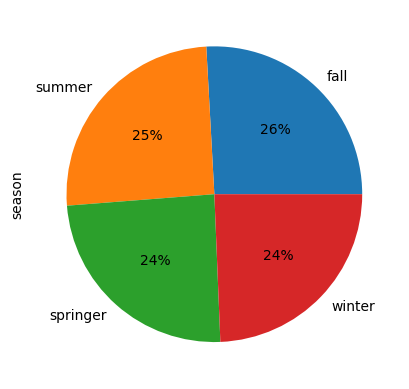

In [ ]:
df_hour.season.value_counts().plot(kind='pie', autopct='%1.0f%%')

There are almost the same percentage of how much bike rental record based on four seasons

In [ ]:
rental_by_season = df_day.groupby('season', as_index =False)['cnt'].sum()
rental_by_season_per_hour = df_hour.groupby('season', as_index =False)['cnt'].sum()

In [ ]:
rental_by_season.sort_values(by='cnt', ascending=False)

,season,cnt
0,fall,1061129
2,summer,918589
3,winter,841613
1,springer,471348


In [ ]:
rental_by_season_per_hour.sort_values(by='cnt', ascending=False)

,season,cnt
0,fall,1061129
2,summer,918589
3,winter,841613
1,springer,471348


Based on exploration above, the highest bike rental occured in fall season which is more than 1 million times. The lowest bike rental happened in springer with online 400+ thousand.

In [ ]:
rental_record_per_hour = df_hour.groupby('hr', as_index =False)['cnt'].sum()

In [ ]:
rental_record_per_hour

,hr,cnt
0,0,39130
1,1,24164
2,2,16352
3,3,8174
4,4,4428
5,5,14261
6,6,55132
7,7,154171
8,8,261001
9,9,159438


In [ ]:
rental_record_per_hour.sort_values(by='cnt', ascending=False)

,hr,cnt
17,17,336860
18,18,309772
8,8,261001
16,16,227748
19,19,226789
13,13,184919
12,12,184414
15,15,183149
14,14,175652
20,20,164550


In [ ]:
#group by data to sum bike rental record based on season and hour of rental occured
rental_record_per_hour_per_season = df_hour.groupby(['season','hr'])['cnt'].sum()

In [ ]:
rental_record_per_hour_per_season['fall'].sort_values(ascending=False)

hr
17    107562
18    102330
8      79204
19     78383
16     69516
20     58505
12     56458
13     55656
15     54221
14     53060
7      52000
9      47927
11     47319
21     45147
10     40405
22     34416
23     22986
6      18946
0      13822
1       8132
2       5716
5       4947
3       2930
4       1541
Name: cnt, dtype: int64

In [ ]:
rental_record_per_hour_per_season['springer'].sort_values(ascending=False)

hr
17    47780
18    43110
8     42095
16    32999
19    29837
13    28175
15    28018
12    27131
14    26605
9     26316
11    21575
20    21211
7     20655
10    17939
21    16497
22    12440
23     7994
6      7261
0      4878
1      3229
2      2175
5      1830
3      1108
4       490
Name: cnt, dtype: int64

In [ ]:
rental_record_per_hour_per_season['winter'].sort_values(ascending=False)

hr
17    86050
18    75428
8     69757
16    61402
19    52575
12    49573
15    49528
13    49066
14    47084
9     42142
7     40763
11    39841
20    37549
10    32994
21    28555
22    21871
23    15300
6     14376
0      9971
1      6322
2      4159
5      3976
3      2052
4      1279
Name: cnt, dtype: int64

In [ ]:
rental_record_per_hour_per_season['summer'].sort_values(ascending=False)

hr
17    95468
18    88904
8     69945
19    65994
16    63831
13    52022
15    51382
12    51252
14    48903
20    47285
9     43053
11    42585
7     40753
21    35246
10    34919
22    26885
23    17661
6     14549
0     10459
1      6481
2      4302
5      3508
3      2084
4      1118
Name: cnt, dtype: int64

Based on information above, we know top 3 of hour when highest bike rental happened in all of 4 season. 17, 18 and 8 is the best hour when bike rental mostly happened.

The lowest bike rental happen in 4 season occured in around 3 to 5.

Why the highest and the lowest bike rental occured in those time in fall season?

In [ ]:
df_fall = df_hour[df_hour['season'] == 'fall']

In [ ]:
df_fall.describe()

,instant,yr,hr,temp,atemp,hum,windspeed,casual,registered,cnt
count,4496.000000,4496.000000,4496.000000,4496.000000,4496.000000,4496.000000,4496.000000,4496.000000,4496.000000,4496.000000
mean,9526.588968,2011.501779,11.507562,0.706410,0.656004,0.633167,0.171593,50.287144,185.729093,236.016237
std,4428.774214,0.500052,6.914217,0.093903,0.089505,0.177866,0.109354,51.751916,166.430156,197.711630
min,4011.000000,2011.000000,0.000000,0.380000,0.242400,0.160000,0.000000,0.000000,0.000000,1.000000
25%,5134.750000,2011.000000,6.000000,0.640000,0.606100,0.500000,0.104500,10.000000,54.000000,68.000000
50%,12771.500000,2012.000000,12.000000,0.700000,0.666700,0.650000,0.164200,36.000000,153.000000,199.000000
75%,13895.250000,2012.000000,17.000000,0.760000,0.712100,0.780000,0.253700,72.000000,255.250000,345.000000
max,15019.000000,2012.000000,23.000000,1.000000,1.000000,1.000000,0.850700,350.000000,886.000000,977.000000


In [ ]:
#join data when season is fall and hour bike rental happened at 17, 18, and 8 (hours when highest bike rental happened)
df_17188 = df_fall[df_fall['hr'] == 17].append([df_fall[df_fall['hr'] == 18], df_fall[df_fall['hr'] == 8]])

<ipython-input-31-765a62a3e47a>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_17188 = df_fall[df_fall['hr'] == 17].append([df_fall[df_fall['hr'] == 18], df_fall[df_fall['hr'] == 8]])


In [ ]:
df_17188

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
4027,4028,2011-06-21,fall,2011,June,17,No,Tuesday,Yes,Clear,0.78,0.7576,0.66,0.2239,65,507,572
4051,4052,2011-06-22,fall,2011,June,17,No,Wednesday,Yes,Mist,0.80,0.7576,0.55,0.3881,67,462,529
4075,4076,2011-06-23,fall,2011,June,17,No,Thursday,Yes,Mist,0.72,0.6818,0.70,0.3582,74,495,569
4099,4100,2011-06-24,fall,2011,June,17,No,Friday,Yes,Clear,0.76,0.6667,0.37,0.2537,85,472,557
4123,4124,2011-06-25,fall,2011,June,17,No,Saturday,No,Clear,0.74,0.6667,0.42,0.2239,152,247,399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14907,14908,2012-09-18,fall,2012,September,8,No,Tuesday,Yes,Mist,0.66,0.6061,0.83,0.5522,32,640,672
14931,14932,2012-09-19,fall,2012,September,8,No,Wednesday,Yes,Clear,0.52,0.5000,0.59,0.2239,39,758,797
14955,14956,2012-09-20,fall,2012,September,8,No,Thursday,Yes,Clear,0.50,0.4848,0.68,0.0896,44,746,790
14979,14980,2012-09-21,fall,2012,September,8,No,Friday,Yes,Clear,0.54,0.5152,0.73,0.1343,31,726,757


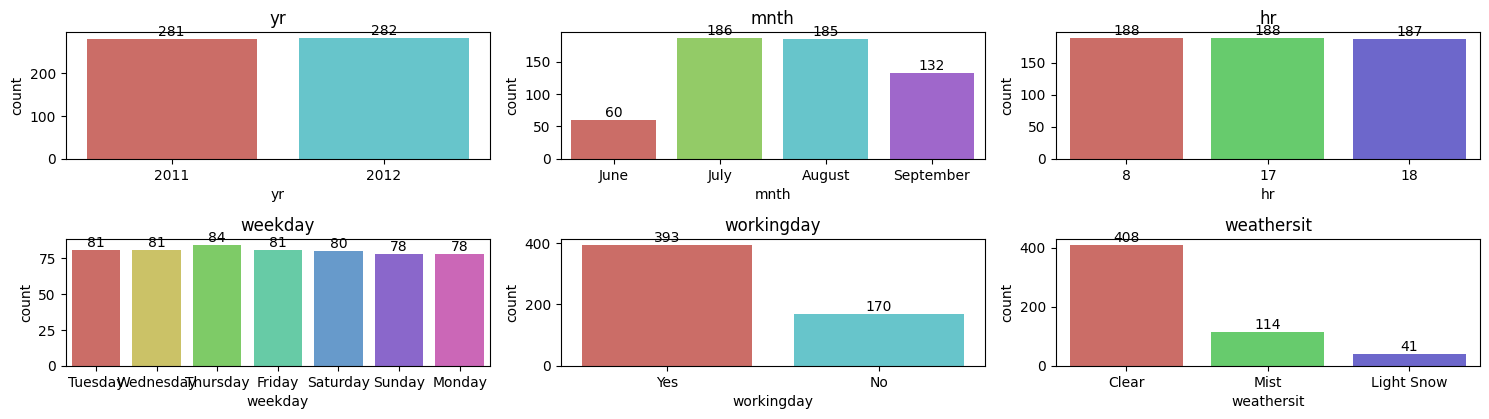

In [ ]:
list_of_categoric = ['yr','mnth','hr','weekday','workingday','weathersit']

plt.figure(figsize = (15, 8));
number = 1
row = 4
for i in list_of_categoric:
    #df_profession = df[df.Profession==i]
    plt.subplot(row, 3, number)
    ax = sns.countplot(x=i, data=df_17188, palette="hls")
    ax.bar_label(ax.containers[0]);
    number += 1
    plt.title(i)
    plt.tight_layout();

<ipython-input-34-6057e9a90083>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_17188[i])
<ipython-input-34-6057e9a90083>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_17188[i])
<ipython-input-34-6057e9a90083>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in

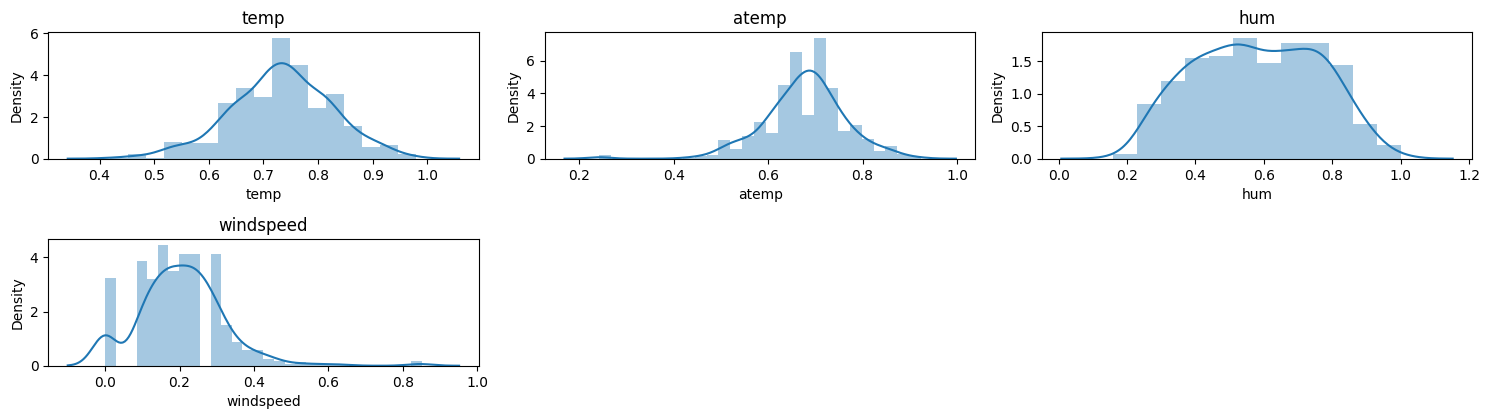

In [ ]:
list_of_numeric = ['temp', 'atemp', 'hum', 'windspeed']

plt.figure(figsize = (15, 8));
number = 1
row = 4
for i in list_of_numeric:
    #df_profession = df[df.Profession==i]
    plt.subplot(row, 3, number)
    sns.distplot(df_17188[i])
    number += 1
    plt.title(i)
    plt.tight_layout();

In [ ]:
rental_record_per_weathersit = df_17188.groupby('weathersit', as_index =False)['cnt'].sum()
rental_record_per_weathersit

,weathersit,cnt
0,Clear,217237
1,Light Snow,14803
2,Mist,57056


In [ ]:
rental_record_per_year_per_month = df_17188.groupby(['yr','mnth'])['cnt'].sum()
rental_record_per_year_per_month

yr    mnth     
2011  August       38662
      July         36533
      June         14332
      September    24304
2012  August       60198
      July         54750
      June         17481
      September    42836
Name: cnt, dtype: int64

In [ ]:
rental_record_per_year_per_month_per_weathersit = df_17188.groupby(['yr','mnth','weathersit'])['cnt'].sum()
rental_record_per_year_per_month_per_weathersit

yr    mnth       weathersit
2011  August     Clear         31238
                 Light Snow     1542
                 Mist           5882
      July       Clear         32613
                 Light Snow      706
                 Mist           3214
      June       Clear          9466
                 Light Snow     1083
                 Mist           3783
      September  Clear         13461
                 Light Snow     3536
                 Mist           7307
2012  August     Clear         36966
                 Light Snow     4029
                 Mist          19203
      July       Clear         42145
                 Light Snow     2585
                 Mist          10020
      June       Clear         15706
                 Mist           1775
      September  Clear         35642
                 Light Snow     1322
                 Mist           5872
Name: cnt, dtype: int64

In [ ]:
df_17188.describe()

,instant,yr,hr,temp,atemp,hum,windspeed,casual,registered,cnt
count,563.000000,563.000000,563.000000,563.00000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000
mean,9522.696270,2011.500888,14.326821,0.73254,0.676685,0.578117,0.206041,75.523979,437.968028,513.492007
std,4431.157081,0.500444,4.502246,0.09247,0.086818,0.180145,0.118606,49.040698,215.785140,224.714571
min,4019.000000,2011.000000,8.000000,0.42000,0.242400,0.160000,0.000000,2.000000,6.000000,8.000000
25%,5140.000000,2011.000000,8.000000,0.66000,0.621200,0.430000,0.134300,35.000000,259.500000,372.000000
50%,12772.000000,2012.000000,17.000000,0.74000,0.681800,0.580000,0.194000,69.000000,442.000000,514.000000
75%,13893.000000,2012.000000,18.000000,0.80000,0.727300,0.740000,0.253700,98.500000,626.000000,683.000000
max,15014.000000,2012.000000,18.000000,0.98000,0.924200,1.000000,0.850700,295.000000,886.000000,977.000000


In [ ]:
#Since right skewed distribution, I get median from the data
df_17188['windspeed'].median()

0.194

In [ ]:
rental_record_per_day = df_17188.groupby(['weekday'])['cnt'].sum()
rental_record_per_day

weekday
Friday       45289
Monday       46293
Saturday     24095
Sunday       22593
Thursday     50738
Tuesday      49795
Wednesday    50293
Name: cnt, dtype: int64

Based on data exploration above, we know that bike rental mostly happened in fall season during June to September between 2011 and 2012. The highest bike rental happened at 17, 18 and 8 AM. The highest bike rental always happened in August each year.

There are three weather suit for made fall season had the highest bike rental
1. Clear weather
2. Mist
3. Light Snow

People like to do bike rental despite on working day (Monday to Friday) because of good weathersit with average 0.74 celcius, 0,67 celcius feeling temperature, 0.57 humidity score, and 0.109 windspeed score.

**Conclusion**
1. Which season that the most people to rental the bike happen?

The most bike rental happened is in fall season

2. What the reasons of the one season when the bike rental highly occured?
Bike rental mostly happened in fall season is because of several reasons:

a. Clear weathersit that means the weather is few cloudy, mist, and light snow

b. Good temperature score (0.74 celcius), feeling temperature score (0.64), humidity score (0.57), and windspeed score (0.109) which mean there are not too hot and too cold for people to bycyling outside.

c. With good temperature and weathersit, the most people like to bycyling outside despite on working day. Thats why bike rental count increase a lot during fall season each year.

In [ ]:
df_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,2011,January,0,No,Saturday,No,Clear,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,springer,2011,January,1,No,Saturday,No,Clear,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,springer,2011,January,2,No,Saturday,No,Clear,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,springer,2011,January,3,No,Saturday,No,Clear,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,springer,2011,January,4,No,Saturday,No,Clear,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,springer,2012,December,19,No,Monday,Yes,Mist,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,springer,2012,December,20,No,Monday,Yes,Mist,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,springer,2012,December,21,No,Monday,Yes,Clear,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,springer,2012,December,22,No,Monday,Yes,Clear,0.26,0.2727,0.56,0.1343,13,48,61
